In [151]:
import math
import matplotlib
import numpy as np
import pandas as pd
import time
from sklearn import metrics
from sklearn.metrics import r2_score
from datetime import date, datetime, time
from matplotlib import pyplot as plt

np.warnings.filterwarnings('ignore')

%matplotlib inline

In [152]:
#When making scatter plot for prediction and test we want the points to be close to the 45 degree line
#or y=x line as it indicated a more accurate prediction.

##  1)Linear Regression

In [153]:
df = pd.read_csv(r'C:\Users\vkumar\Downloads\GOOGL.csv')

In [154]:
df.loc[:, 'Date'] = pd.to_datetime(df['Date'],format='%Y-%m-%d')

df.columns = [str(x).replace(' ', '_') for x in df.columns]

df.sort_values(by='Date', inplace=True, ascending=True)

df.head(10)

,Date,Open,High,Low,Close,Adj_Close,Volume
0,2011-07-01,253.623627,314.064056,253.443436,302.147156,302.147156,161948890
1,2011-08-01,305.915924,308.058044,245.675674,270.750763,270.750763,213337649
2,2011-09-01,270.645660,279.539551,255.505508,257.777771,257.777771,117142138
3,2011-10-01,255.180176,301.651642,240.540543,296.616608,296.616608,154276567
4,2011-11-01,290.340332,309.459473,280.945953,299.994995,299.994995,120480396
5,2011-12-01,300.300293,323.703705,299.799805,323.273285,323.273285,109984906
6,2012-01-01,326.796783,335.460449,282.557556,290.345337,290.345337,147137914
7,2012-02-01,292.762756,313.113098,289.859863,309.434448,309.434448,94634472
8,2012-03-01,311.441437,329.624634,297.217224,320.940948,320.940948,94565740
9,2012-04-01,320.705719,326.896912,295.395386,302.727722,302.727722,117637645


In [155]:
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from math import sqrt

In [156]:
dfreg = df.loc[:,['Open','Close','Adj_Close','Volume']]

In [157]:
dfreg.fillna(value=-99999, inplace=True)

forecast_out = int(math.ceil(0.01 * len(dfreg)))

dfreg['label'] = dfreg['Adj_Close'].shift(-forecast_out)

X = np.array(dfreg.drop(['label'], 1))

X = preprocessing.scale(X)

X = X[:-forecast_out]

y = np.array(dfreg['label'])

y = y[:-forecast_out]

In [158]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [159]:
clfreg = LinearRegression(n_jobs=-1)
clfreg.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [160]:
print(clfreg.score(X_test, y_test))

0.988082208571805


In [161]:
ypred=clfreg.predict(X_test)

In [162]:
print('MAE =',metrics.mean_absolute_error(y_test,ypred))
print('MSE =',metrics.mean_squared_error(y_test,ypred))
print('RMSE =',np.sqrt(metrics.mean_squared_error(y_test,ypred)))


MAE = 41.51080651534772
MSE = 3115.47645237366
RMSE = 55.81645324072159


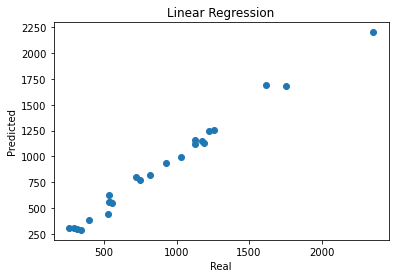

In [163]:
plt.scatter(y_test,ypred)
plt.xlabel("Real")
plt.ylabel("Predicted")
plt.title("Linear Regression")
plt.show()

##  2)KNN

In [164]:
df = pd.read_csv(r'C:\Users\vkumar\Downloads\GOOGL.csv')

In [165]:
df.loc[:, 'Date'] = pd.to_datetime(df['Date'],format='%Y-%m-%d')

df.columns = [str(x).replace(' ', '_') for x in df.columns]

df.sort_values(by='Date', inplace=True, ascending=True)

df.head(10)

,Date,Open,High,Low,Close,Adj_Close,Volume
0,2011-07-01,253.623627,314.064056,253.443436,302.147156,302.147156,161948890
1,2011-08-01,305.915924,308.058044,245.675674,270.750763,270.750763,213337649
2,2011-09-01,270.645660,279.539551,255.505508,257.777771,257.777771,117142138
3,2011-10-01,255.180176,301.651642,240.540543,296.616608,296.616608,154276567
4,2011-11-01,290.340332,309.459473,280.945953,299.994995,299.994995,120480396
5,2011-12-01,300.300293,323.703705,299.799805,323.273285,323.273285,109984906
6,2012-01-01,326.796783,335.460449,282.557556,290.345337,290.345337,147137914
7,2012-02-01,292.762756,313.113098,289.859863,309.434448,309.434448,94634472
8,2012-03-01,311.441437,329.624634,297.217224,320.940948,320.940948,94565740
9,2012-04-01,320.705719,326.896912,295.395386,302.727722,302.727722,117637645


In [166]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from math import sqrt

In [167]:
dfreg = df.loc[:,['Open','Close','Adj_Close','Volume']]

In [168]:
dfreg.fillna(value=-99999, inplace=True)

forecast_out = int(math.ceil(0.02 * len(dfreg)))

dfreg['label'] = dfreg['Adj_Close'].shift(-forecast_out)

X = np.array(dfreg.drop(['label'], 1))

X = preprocessing.scale(X)

X = X[:-forecast_out]
X_lately = X[-forecast_out:]

y = np.array(dfreg['label'])

y = y[:-forecast_out]

In [169]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [170]:
clfknn = KNeighborsRegressor(n_neighbors=6)
clfknn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=6)

In [171]:
print(clfknn.score(X_test, y_test))

0.9542956450301342


In [172]:
rmse_val = [] 
for K in range(15):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  
    pred=model.predict(X_test)
    error = np.sqrt(metrics.mean_squared_error(y_test,pred)) 
    rmse_val.append(error) 
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 76.75302913155613
RMSE value for k=  2 is: 87.61092248733175
RMSE value for k=  3 is: 65.28891584685111
RMSE value for k=  4 is: 83.1675113246326
RMSE value for k=  5 is: 95.46329464333972
RMSE value for k=  6 is: 103.29848534765618
RMSE value for k=  7 is: 109.42610414358205
RMSE value for k=  8 is: 121.0338570635488
RMSE value for k=  9 is: 118.31796354961833
RMSE value for k=  10 is: 125.65883829022552
RMSE value for k=  11 is: 133.2866699613601
RMSE value for k=  12 is: 138.3585119639466
RMSE value for k=  13 is: 144.93470362712077
RMSE value for k=  14 is: 156.12597527764734
RMSE value for k=  15 is: 161.72559343812233


Text(0, 0.5, 'RMSE')

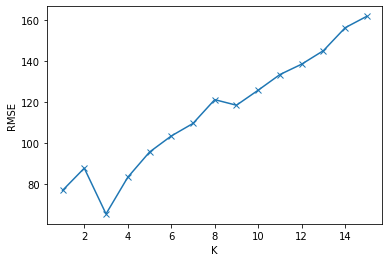

In [173]:
plt.figure(figsize=(6, 4))
plt.plot(range(1, K+1), rmse_val, 'x-')
plt.grid(b=True, which='minor', color='w', linestyle='-')
plt.xlabel('K')
plt.ylabel('RMSE')

In [174]:
def get_mape(y_true, y_pred): 
    
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [175]:
mape=[]
for K in range(15):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  
    pred=model.predict(X_test)
    error = get_mape(y_test,pred)
    mape.append(error) 

Text(0, 0.5, 'MAPE')

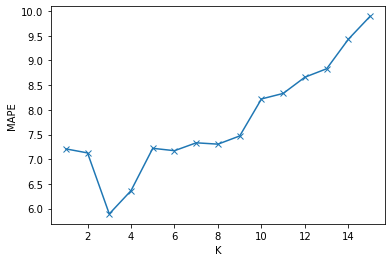

In [176]:
plt.figure(figsize=(6,4))
plt.plot(range(1, K+1), mape, 'x-')
plt.grid(b=True, which='minor', color='w', linestyle='-')

plt.xlabel('K')
plt.ylabel('MAPE')


In [177]:
R2=[]
for K in range(15):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    model.fit(X_train, y_train)  
    pred=model.predict(X_test)
    error = r2_score(y_test,pred)
    R2.append(error) 
print(R2)

[0.9747674742211758, 0.9671234540799282, 0.9817421938812169, 0.970373722326624, 0.9609660488387617, 0.9542956450301342, 0.9487124974103363, 0.9372543787199177, 0.9400386987401435, 0.9323674507116438, 0.9239072793548457, 0.918006119225771, 0.9100265340802837, 0.8955953106294815, 0.8879718449496045]


Text(0, 0.5, 'R2')

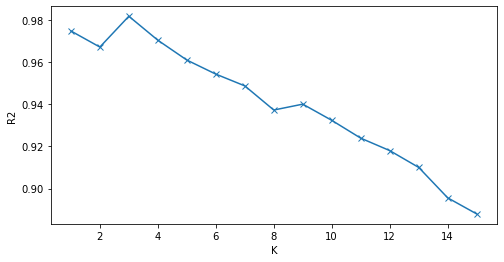

In [178]:
plt.figure(figsize=(8, 4))
plt.plot(range(1,K+1), R2, 'x-')
plt.grid(b=True, which='minor', color='w', linestyle='-')
plt.xlabel('K')
plt.ylabel('R2')

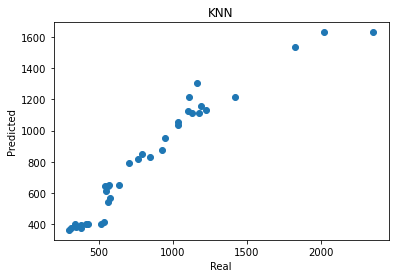

In [179]:
plt.scatter(y_test,pred)
plt.xlabel("Real")
plt.ylabel("Predicted")
plt.title("KNN")
plt.show()

## 3)Random Forest

In [180]:
df = pd.read_csv(r'C:\Users\vkumar\Downloads\GOOGL.csv')

In [181]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import ParameterGrid
from sklearn.ensemble import RandomForestClassifier


In [182]:
#dfreg = df.loc[:,['Adj_Close', 'Volume']]

In [183]:
dfreg.fillna(value=-99999, inplace=True)

forecast_out = int(math.ceil(0.02 * len(dfreg)))

dfreg['label'] = dfreg['Adj_Close'].shift(-forecast_out)

X = np.array(dfreg.drop(['label'], 1))

X = preprocessing.scale(X)

X = X[:-forecast_out]
X_lately = X[-forecast_out:]

y = np.array(dfreg['label'])

y = y[:-forecast_out]

In [184]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [185]:
clf = RandomForestRegressor(n_estimators = 50,random_state=42)

In [186]:
model = clf.fit(X_train, y_train)

In [187]:
print(model.score(X_test, y_test))

0.9768247934019361


In [188]:
Rmse=[]
for n in range(10,100,5):
    clf = RandomForestRegressor(n_estimators = n,random_state=42)
    model = clf.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    error=np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    Rmse.append(error)
    print('RMSE value for n_estimators= ' , n , 'is:', error)

RMSE value for n_estimators=  10 is: 78.37155655762783
RMSE value for n_estimators=  15 is: 74.57341627110546
RMSE value for n_estimators=  20 is: 75.41864305474655
RMSE value for n_estimators=  25 is: 74.04706825990992
RMSE value for n_estimators=  30 is: 74.67093696308278
RMSE value for n_estimators=  35 is: 74.25197377527
RMSE value for n_estimators=  40 is: 72.51703885268981
RMSE value for n_estimators=  45 is: 73.56729870247692
RMSE value for n_estimators=  50 is: 73.55750140249727
RMSE value for n_estimators=  55 is: 74.17918056325202
RMSE value for n_estimators=  60 is: 73.94271803341405
RMSE value for n_estimators=  65 is: 74.45647404954049
RMSE value for n_estimators=  70 is: 73.9988873148306
RMSE value for n_estimators=  75 is: 74.59000087682018
RMSE value for n_estimators=  80 is: 74.43380646455901
RMSE value for n_estimators=  85 is: 73.71464302877959
RMSE value for n_estimators=  90 is: 73.51613789258928
RMSE value for n_estimators=  95 is: 73.75135299678497


Text(0, 0.5, 'RMSE')

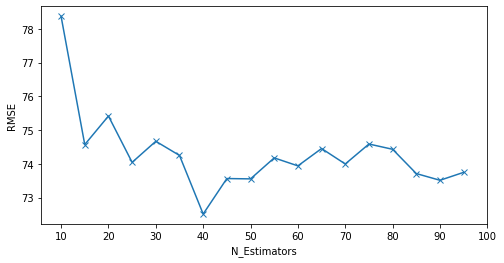

In [189]:
plt.figure(figsize=(8, 4))
plt.plot(range(10, 100,5), Rmse, 'x-')
plt.grid(b=True, which='minor', color='w', linestyle='-')
plt.xticks([10,20,30,40,50,60,70,80,90,100])
plt.xlabel('N_Estimators')
plt.ylabel('RMSE')

In [190]:
def get_mape(y_true, y_pred): 
    
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [191]:
mape=[]
for n in range(10,100,5): 
    clf = RandomForestRegressor(n_estimators = n,random_state=42)
    model = clf.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    error=get_mape(y_test,y_pred)
    mape.append(error)
print(mape)

[6.557973328347669, 6.203824442933197, 6.205705584078219, 6.105761891130517, 6.048363797263585, 6.133724221158302, 6.031513049812816, 6.045317389552114, 5.997086138850892, 5.938371842620332, 5.984821556983918, 5.962837546779017, 5.965408272802281, 6.004464947372941, 5.968333529250908, 5.908936993949662, 5.91151487423149, 5.919998531523444]


Text(0, 0.5, 'MAPE')

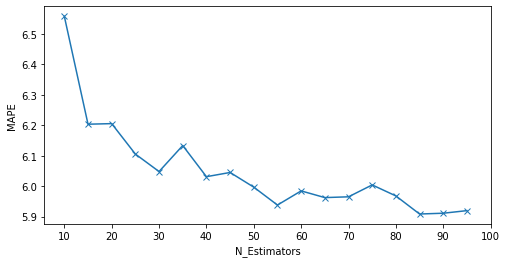

In [192]:
plt.figure(figsize=(8,4))
plt.plot(range(10,100,5), mape, 'x-')
plt.grid(b=True, which='minor', color='w', linestyle='-')
plt.xticks([10,20,30,40,50,60,70,80,90,100])
plt.xlabel('N_Estimators')
plt.ylabel('MAPE')

In [193]:
R2=[]
for n in range(10,100,5): 
    clf = RandomForestRegressor(n_estimators = n,random_state=42)
    model = clf.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    error = r2_score(y_test,y_pred)
    R2.append(error) 
print(R2)


[0.9736920733734441, 0.9761802195157532, 0.9756372053048933, 0.9765152785528749, 0.9761178798657777, 0.9763851233088136, 0.9774757779167682, 0.9768186194681355, 0.9768247934019361, 0.976431402485592, 0.9765814232170826, 0.9762548668664303, 0.9765458306860896, 0.9761696236328086, 0.9762693226380268, 0.9767256687829488, 0.9768508502511491, 0.9767024817290545]


Text(0, 0.5, 'R2')

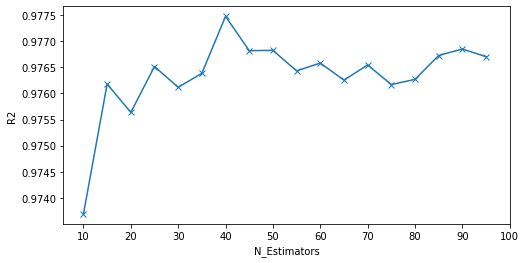

In [194]:
plt.figure(figsize=(8, 4))
plt.plot(range(10, 100,5), R2, 'x-')
plt.grid(b=True, which='minor', color='w', linestyle='-')
plt.xticks([10,20,30,40,50,60,70,80,90,100])
plt.xlabel('N_Estimators')
plt.ylabel('R2')

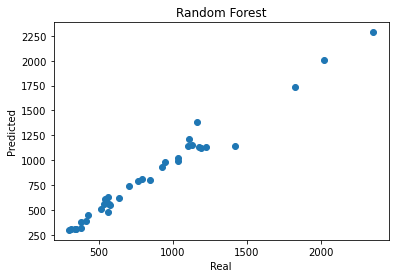

In [195]:
plt.scatter(y_test,y_pred)
plt.xlabel("Real")
plt.ylabel("Predicted")
plt.title("Random Forest")
plt.show()

## 4)XGBoost 

In [196]:
from xgboost import XGBRegressor

In [197]:
df = pd.read_csv(r'C:\Users\vkumar\Downloads\GOOGL.csv')

In [198]:
#dfreg = df.loc[:,['Adj_Close', 'Volume']]

In [199]:
dfreg.fillna(value=-99999, inplace=True)

forecast_out = int(math.ceil(0.02 * len(dfreg)))

dfreg['label'] = dfreg['Adj_Close'].shift(-forecast_out)

X = np.array(dfreg.drop(['label'], 1))

X = preprocessing.scale(X)

X = X[:-forecast_out]
X_lately = X[-forecast_out:]

y = np.array(dfreg['label'])

y = y[:-forecast_out]

In [200]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [201]:
clfxgb = XGBRegressor(eval_metric = "mlogloss",n_estimators=15)
clfxgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eval_metric='mlogloss',
             gamma=0, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=15, n_jobs=8,
             num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [202]:
print(clfxgb.score(X_test, y_test))

0.9580338606143847


In [203]:
Rmse=[]
for n in range(10,100,5):
    clf = XGBRegressor(n_estimators = n,random_state=42)
    model = clf.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    error=np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    Rmse.append(error)
    print('RMSE value for n_estimators= ' , n , 'is:', error)

RMSE value for n_estimators=  10 is: 112.46074358352982
RMSE value for n_estimators=  15 is: 98.98392501058058
RMSE value for n_estimators=  20 is: 97.78659361317109
RMSE value for n_estimators=  25 is: 97.91233200951528
RMSE value for n_estimators=  30 is: 98.58444632881275
RMSE value for n_estimators=  35 is: 98.38975830936675
RMSE value for n_estimators=  40 is: 98.50213811497945
RMSE value for n_estimators=  45 is: 98.67896292166232
RMSE value for n_estimators=  50 is: 98.71187039368702
RMSE value for n_estimators=  55 is: 98.76265961323062
RMSE value for n_estimators=  60 is: 98.75182855173783
RMSE value for n_estimators=  65 is: 98.80344730712004
RMSE value for n_estimators=  70 is: 98.82587343109753
RMSE value for n_estimators=  75 is: 98.84109891904082
RMSE value for n_estimators=  80 is: 98.85126160194288
RMSE value for n_estimators=  85 is: 98.85869301019383
RMSE value for n_estimators=  90 is: 98.86325699658752
RMSE value for n_estimators=  95 is: 98.86413692450836


Text(0, 0.5, 'RMSE')

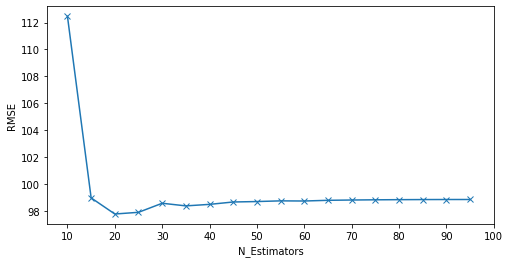

In [204]:
plt.figure(figsize=(8, 4))
plt.plot(range(10, 100,5), Rmse, 'x-')
plt.grid(b=True, which='minor', color='w', linestyle='-')
plt.xticks([10,20,30,40,50,60,70,80,90,100])
plt.xlabel('N_Estimators')
plt.ylabel('RMSE')

In [205]:
def get_mape(y_true, y_pred): 
    
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [206]:
mape=[]
for n in range(10,100,5): 
    clf = XGBRegressor(n_estimators = n,random_state=42)
    model = clf.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    error=get_mape(y_test,y_pred)
    mape.append(error)
print(mape)

[7.461767329937639, 6.913603450908735, 6.994874788862295, 7.124036737010707, 7.362996131110454, 7.354354795552448, 7.430297013737004, 7.464842754637396, 7.503277233846922, 7.522603726043007, 7.532426240648915, 7.541145090179639, 7.549329564377887, 7.5519605477946, 7.553118386803901, 7.55477166155446, 7.555269812284799, 7.556408488137387]


Text(0, 0.5, 'MAPE')

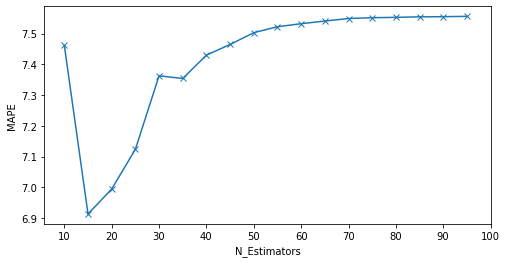

In [207]:
plt.figure(figsize=(8,4))
plt.plot(range(10,100,5), mape, 'x-')
plt.grid(b=True, which='minor', color='w', linestyle='-')
plt.xticks([10,20,30,40,50,60,70,80,90,100])
plt.xlabel('N_Estimators')
plt.ylabel('MAPE')

In [208]:
R2=[]
for n in range(10,100,5): 
    clf = XGBRegressor(n_estimators = n,random_state=42)
    model = clf.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    error = r2_score(y_test,y_pred)
    R2.append(error) 
print(R2)

[0.9458284105552149, 0.9580338606143847, 0.959042983552957, 0.9589375870902408, 0.958371910431085, 0.9585361653028677, 0.9584413920481396, 0.9582920513572203, 0.9582642291757992, 0.9582212703596071, 0.9582304334011629, 0.9581867550899852, 0.9581677716342644, 0.9581548809786221, 0.9581462756405094, 0.9581399824723932, 0.9581361172996974, 0.9581353720812145]


Text(0, 0.5, 'R2')

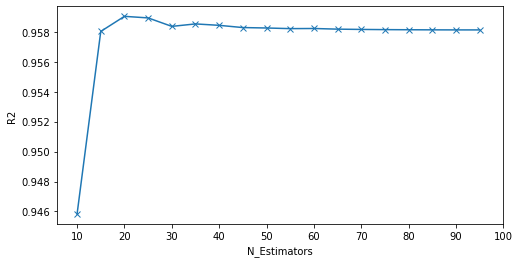

In [209]:
plt.figure(figsize=(8, 4))
plt.plot(range(10, 100,5), R2, 'x-')
plt.grid(b=True, which='minor', color='w', linestyle='-')
plt.xticks([10,20,30,40,50,60,70,80,90,100])
plt.xlabel('N_Estimators')
plt.ylabel('R2')

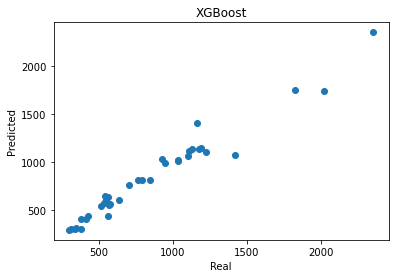

In [210]:
plt.scatter(y_test,y_pred)
plt.xlabel("Real")
plt.ylabel("Predicted")
plt.title("XGBoost")
plt.show()

## 5)Neural Network

In [211]:
from sklearn.neural_network import MLPRegressor

In [212]:
df = pd.read_csv(r'C:\Users\vkumar\Downloads\GOOGL.csv')

In [213]:
#dfreg = df.loc[:,['Adj_Close', 'Volume']]

In [214]:
dfreg.fillna(value=-99999, inplace=True)

forecast_out = int(math.ceil(0.02 * len(dfreg)))

dfreg['label'] = dfreg['Adj_Close'].shift(-forecast_out)

X = np.array(dfreg.drop(['label'], 1))

X = preprocessing.scale(X)

X = X[:-forecast_out]
X_lately = X[-forecast_out:]

y = np.array(dfreg['label'])

y = y[:-forecast_out]

In [215]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [216]:
clfmlp=MLPRegressor(hidden_layer_sizes=(150,100,50), max_iter=250)
clfmlp.fit(X_train, y_train)

MLPRegressor(hidden_layer_sizes=(150, 100, 50), max_iter=250)

In [217]:
print(clfmlp.score(X_test, y_test))

0.8941964691408372


In [218]:
Rmse=[]
for n in range(200,401,25):
    clf = MLPRegressor(hidden_layer_sizes=(150,100,50), max_iter=n)
    model = clf.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    error=np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    Rmse.append(error)
    print('RMSE value for max_iter= ' , n , 'is:', error)

RMSE value for max_iter=  200 is: 176.0997880454328
RMSE value for max_iter=  225 is: 157.1390930471837
RMSE value for max_iter=  250 is: 160.91811087897804
RMSE value for max_iter=  275 is: 154.02643068283336
RMSE value for max_iter=  300 is: 157.49805873028856
RMSE value for max_iter=  325 is: 154.70282703348536
RMSE value for max_iter=  350 is: 145.50071450747205
RMSE value for max_iter=  375 is: 133.4852523795656
RMSE value for max_iter=  400 is: 130.96947698275596


Text(0, 0.5, 'RMSE')

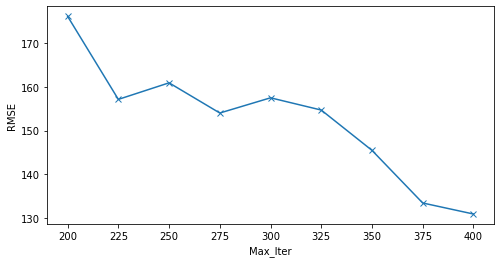

In [219]:
plt.figure(figsize=(8, 4))
plt.plot(range(200, 401,25), Rmse, 'x-')
plt.grid(b=True, which='minor', color='w', linestyle='-')
plt.xlabel('Max_Iter')
plt.ylabel('RMSE')

In [220]:
def get_mape(y_true, y_pred): 
    
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [221]:
mape=[]
for n in range(200,401,25): 
    clf = MLPRegressor(hidden_layer_sizes=(150,100,50), max_iter=n)
    model = clf.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    error=get_mape(y_test,y_pred)
    mape.append(error)
print(mape)

[16.127907070037427, 16.135027115665928, 16.07053335825403, 15.683778080737024, 14.214160885313277, 14.836591201869375, 13.384295648788333, 13.816162960819996, 12.339649609780217]


Text(0, 0.5, 'MAPE')

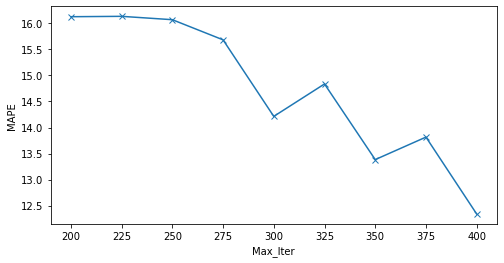

In [222]:
plt.figure(figsize=(8,4))
plt.plot(range(200,401,25), mape, 'x-')
plt.grid(b=True, which='minor', color='w', linestyle='-')
plt.xlabel('Max_Iter')
plt.ylabel('MAPE')

In [223]:
R2=[]
for n in range(200,401,25): 
    clf = MLPRegressor(hidden_layer_sizes=(150,100,50), max_iter=n)
    model = clf.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    error = r2_score(y_test,y_pred)
    R2.append(error) 
print(R2)

[0.8767283908256066, 0.8811349780004871, 0.8923551117719681, 0.890768505549811, 0.8916396696476709, 0.8999864055787827, 0.9140091228754997, 0.9195012991665947, 0.9206274865924686]


Text(0, 0.5, 'R2')

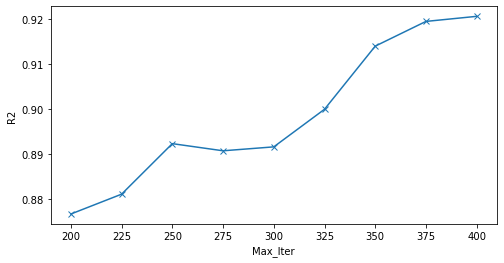

In [224]:
plt.figure(figsize=(8, 4))
plt.plot(range(200, 401,25), R2, 'x-')
plt.grid(b=True, which='minor', color='w', linestyle='-')
plt.xlabel('Max_Iter')
plt.ylabel('R2')

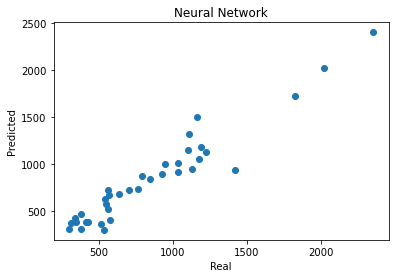

In [225]:
plt.scatter(y_test,y_pred)
plt.xlabel("Real")
plt.ylabel("Predicted")
plt.title("Neural Network")
plt.show()